Part 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score

1.1 a)

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/csv/Car name.csv')

In [ ]:
df1.sample(6)

,car_name
383,honda civic
31,toyota corona
392,chevrolet camaro
356,toyota corolla
37,amc matador
319,mazda 626


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


1.1 b)

In [ ]:
df2=pd.read_json('/content/drive/MyDrive/csv/Car-Attributes.json')

In [ ]:
df2

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


1.1 c)

In [ ]:
df3= pd.concat([df1, df2], axis=1)

In [ ]:
df3.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


1.1 d)

In [ ]:
df3.describe(include= 'all')

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398,398.000000,398.000000,398.000000,398.0,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN
mean,NaN,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,NaN,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,NaN,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,NaN,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,NaN,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,NaN,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


1.2 h)

In [ ]:
df3['hp'] = pd.to_numeric(df3['hp'], errors='coerce')


In [ ]:
df3.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

1.2 a)

In [ ]:
df3.dropna(inplace=True)
df3.reset_index(drop=True, inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 27.7+ KB


1.2 b)

In [ ]:
df3[df3.duplicated()].sum()

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

1.2 c)

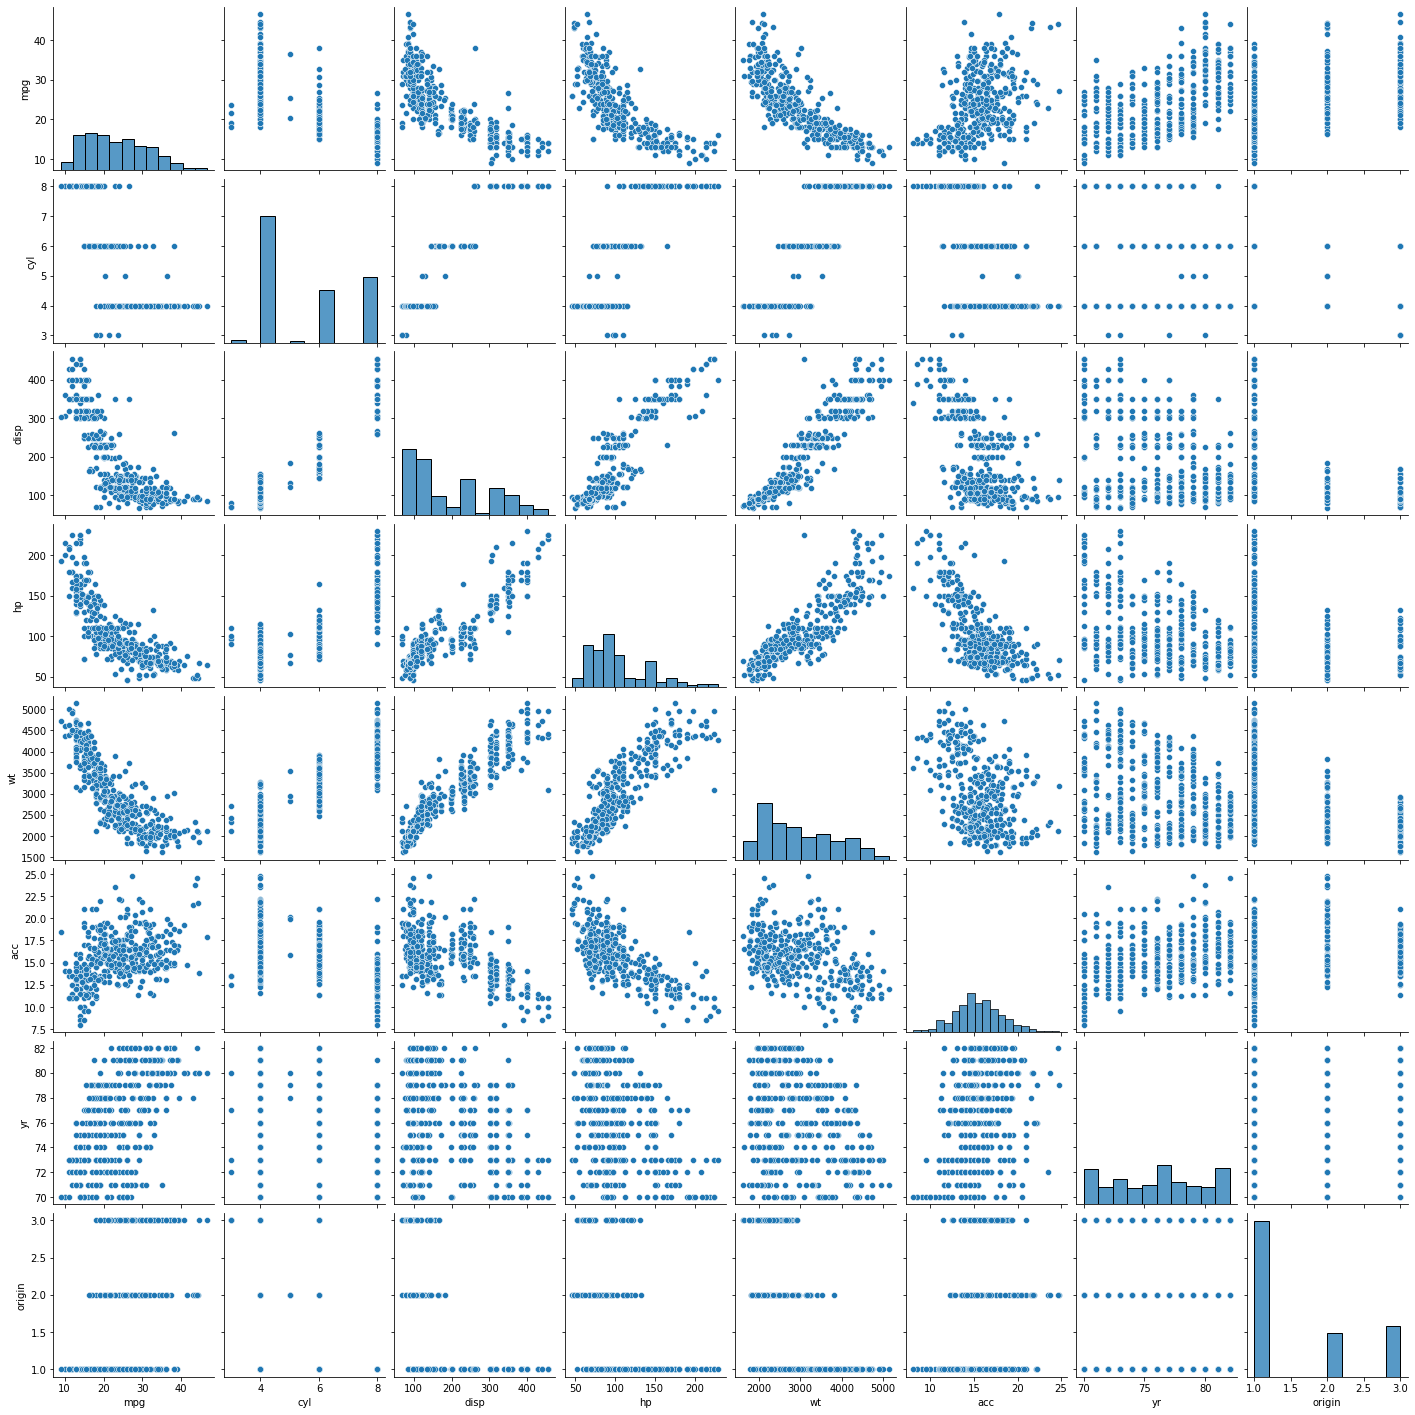

In [ ]:
sns.pairplot(df3)

1.2 d)

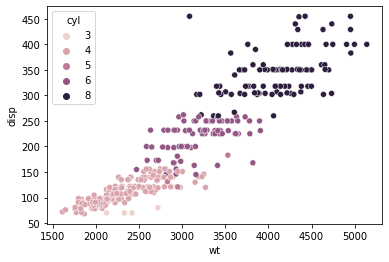

In [ ]:
sns.scatterplot(data =df3, x= 'wt', y='disp', hue='cyl' );

1.2 e) Higher the weight of the car higher the displacement as both are proportional to each other also cars having high cylinder have high displacement compared to cars having less cylinders.

1.2 f)

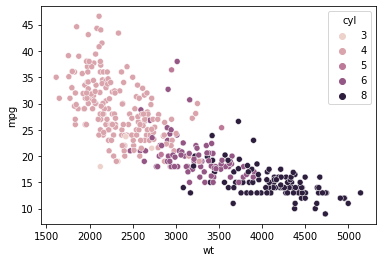

In [ ]:
sns.scatterplot(data =df3, x= 'wt', y='mpg', hue='cyl' );

1.2 g) Higher the weight of the car lower the mpg as both are inversly proportional to each other also cars having high cylinder have low mpg.

In [ ]:
df3.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


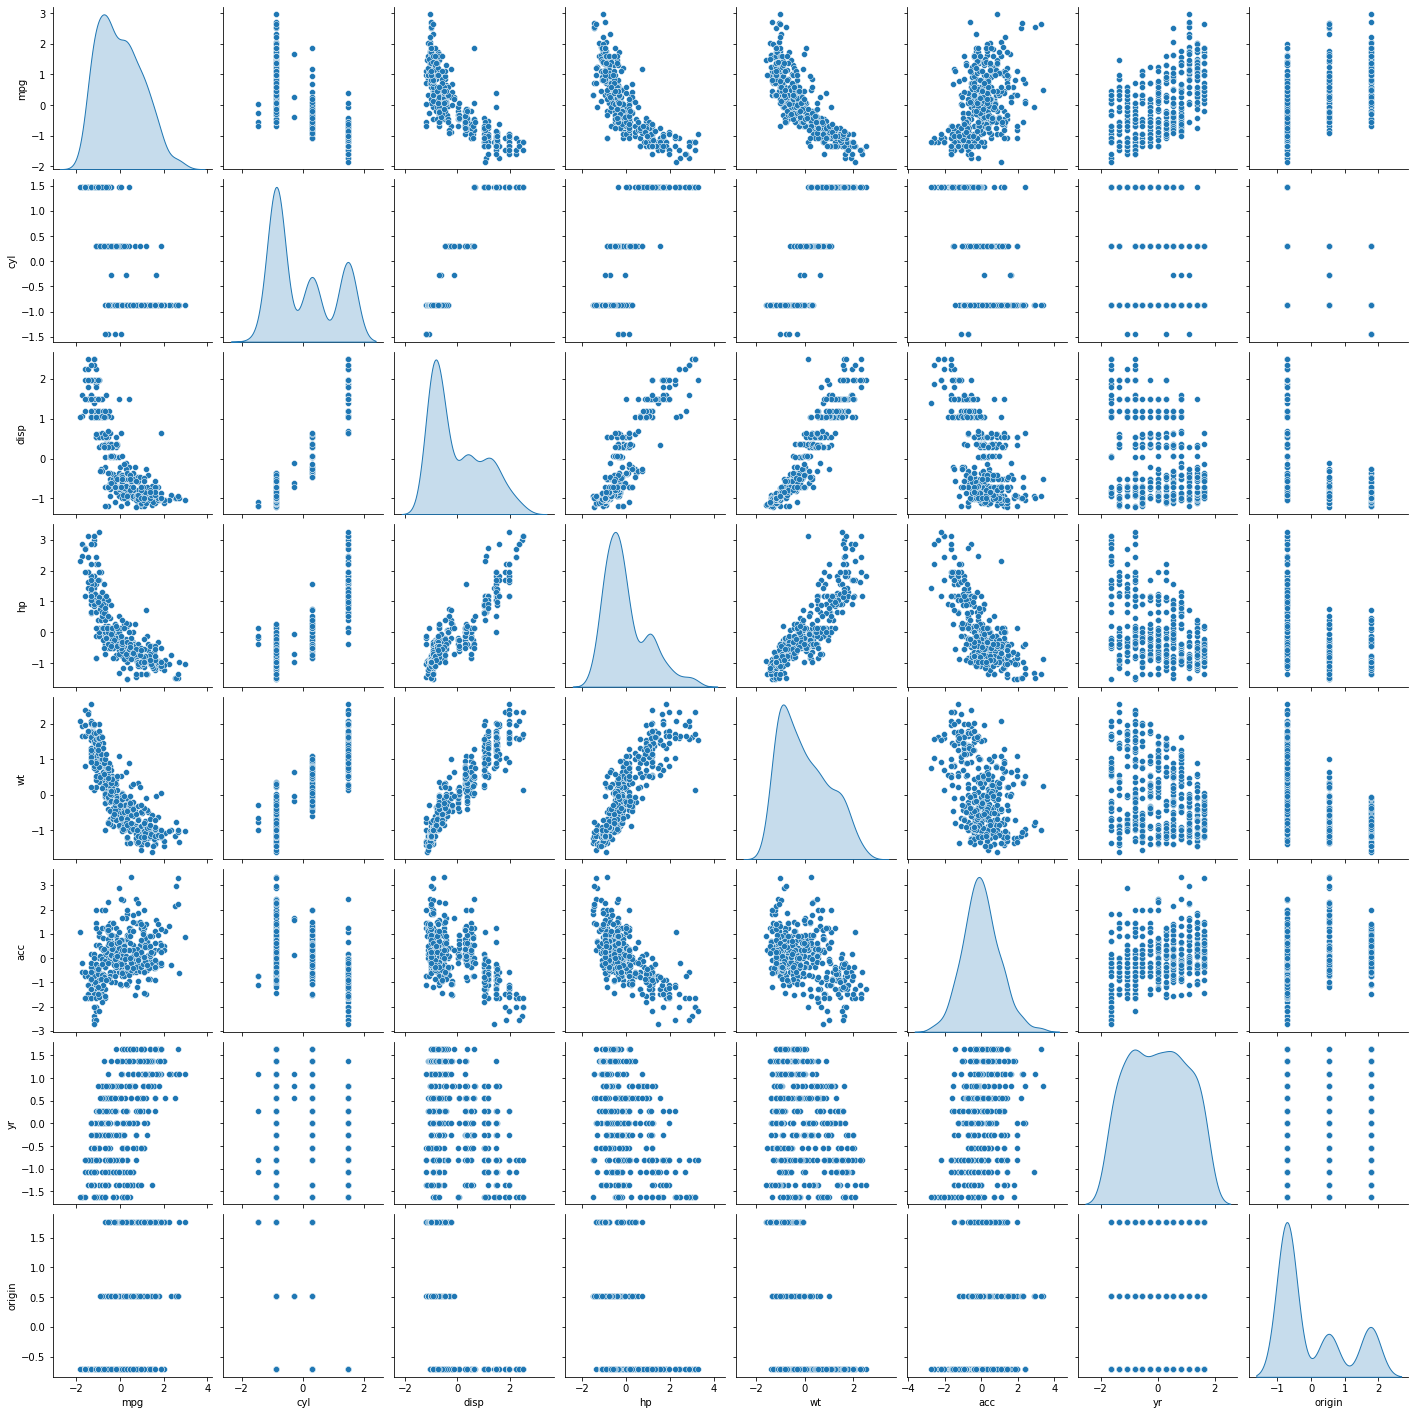

In [ ]:
df4=df3.iloc[:,1:]
df4scaled=df4.apply(zscore)
sns.pairplot(df4scaled,diag_kind='kde')

1.3 a)

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df4scaled)
    prediction=model.predict(df4scaled)
    meanDistortions.append(sum(np.min(cdist(df4scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df4scaled.shape[0])




1.3 b)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

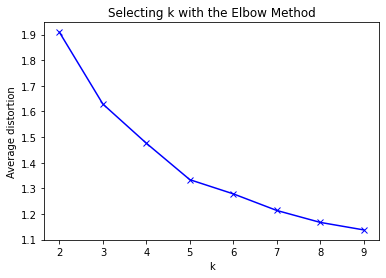

In [ ]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

1.3 c) From the plot it is observed that the optimal number of clusters should be either 3 or 5.

1.3 d)

In [ ]:
final_model2=KMeans(3)
final_model2.fit(df4scaled)

labels = final_model2.labels_
silhouette_score(df4scaled,labels)


0.3245045951380211

In [ ]:
final_model3=KMeans(5)
final_model3.fit(df4scaled)

labels = final_model3.labels_
silhouette_score(df4scaled,labels)


0.3339214769609638

It is observed that model having 5 clusters have score 0.3339and model have 3 cluters have score 0.324. As, model with 5 clusters have good score compared to 3 clusters hence model having 5 clusters considered the best.

1.3 e)

In [ ]:
prediction=final_model3.predict(df4scaled)

#Append the prediction
df3["GROUP"] = prediction
df4scaled["GROUP"] = prediction
df3.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [ ]:
df3clust = df3.groupby(['GROUP'])
df3clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,28.960000,4.200000,132.169231,82.538462,2551.307692,16.523077,79.630769,1.076923
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,24.614458,4.048193,108.728916,85.578313,2351.253012,16.072289,73.337349,2.120482
3,19.081250,6.225000,233.862500,101.987500,3303.875000,16.627500,75.725000,1.037500
4,34.035714,4.085714,99.728571,72.285714,2158.057143,16.740000,79.385714,2.785714


1.3 f)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

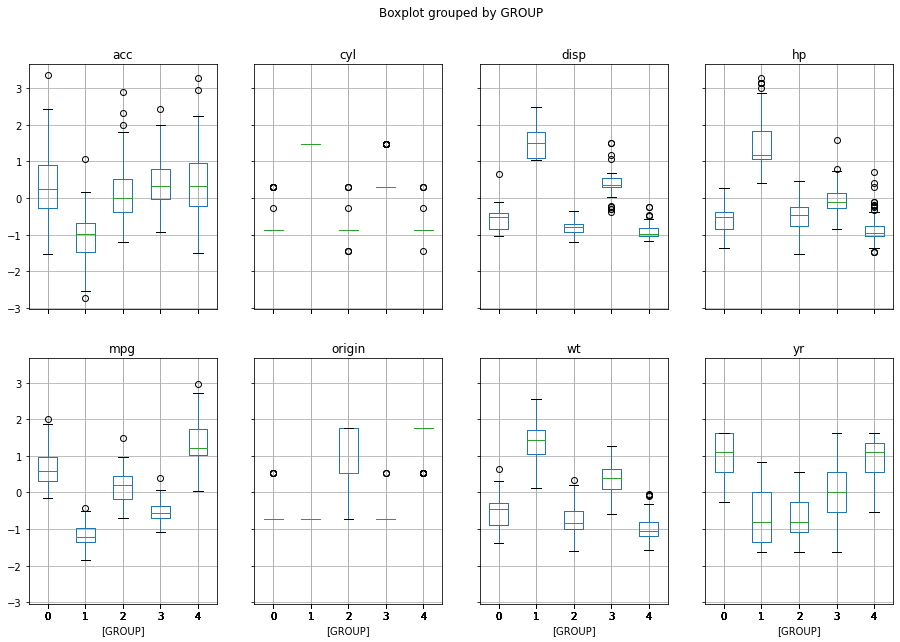

In [ ]:
df4scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

1.3 g)

In [ ]:
a={'mpg' : 22 ,	'cyl': 10 ,	'disp' : 300,	'hp': 150,	'wt': 3000,	'acc': 20,	'yr' :35,	'origin' : 2}
df=pd.DataFrame(a, index=[0])

In [ ]:
prediction=final_model3.predict(df)
prediction

array([1], dtype=int32)

The given datapoint belongs to group 2.

Part 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

2.1 a)

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/csv/vehicle.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
df1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


2.1 b) To check for missing values

In [ ]:
df1.isnull().sum()


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
for value in df1.columns:
  if value != 'class':
    df1[value] = df1[value].fillna(df1.groupby('class')[value].transform('mean'))


In [ ]:
df1[df1.isnull().any(axis=1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [ ]:
df1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

2.1 c) Visualize a Pie-chart and print percentage of values for variable ‘class’.

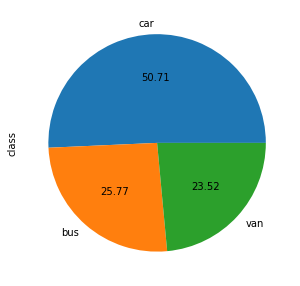

In [ ]:
plt.subplots(figsize=(10, 5))
df1['class'].value_counts().plot(kind='pie', autopct='%.2f');

2.1 d) to check duplicate values.

In [ ]:
df1.duplicated().sum()

0

2.2 a) Split data into X and Y

In [ ]:
X=df1.drop('class', axis=1)
Y=df1['class']


2.2 b)

In [ ]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.516939,0.058393,0.272585,1.310005,0.311542,-0.208454,0.136999,-0.224570,0.758332,-0.402656,-0.343797,0.285146,-0.327335,-0.073173,0.380307,-0.312298,0.183957
1,-0.325470,-0.624899,0.121934,-0.835292,-0.594100,0.094079,-0.600278,0.521243,-0.610982,-0.344578,-0.594035,-0.621609,-0.514155,-0.059499,0.538875,0.156241,0.012982,0.452977
2,1.254193,0.843179,1.519848,1.200807,0.548363,0.311542,1.147858,-1.143812,0.934665,0.689401,1.096481,1.107628,1.391870,0.074419,1.558955,-0.403924,-0.149658,0.049447
3,-0.082445,-0.624899,-0.005149,-0.296325,0.167542,0.094079,-0.750979,0.649324,-0.610982,-0.344578,-0.913001,-0.740672,-1.467168,-1.264761,-0.073173,-0.291891,1.639379,1.529056
4,-1.054545,-0.135540,-0.767647,1.081036,5.245153,9.444962,-0.600278,0.521243,-0.610982,-0.275646,1.670619,-0.649957,0.408115,7.305990,0.538875,-0.179858,-1.450776,-1.699181


2.3 a)

In [ ]:
clf = svm.SVC(gamma=0.025, C=3)

In [ ]:
clf.fit(XScaled , Y)

SVC(C=3, gamma=0.025)

In [ ]:
clf.score(XScaled , Y)

0.983451536643026

2.3 b)

In [ ]:
y_pred=clf.predict(XScaled)
print(classification_report(Y, y_pred))
print(confusion_matrix(Y, y_pred))


              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.99      0.99       429
         van       0.96      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846

[[214   0   4]
 [  2 423   4]
 [  1   3 195]]


2.3 c) Apply PCA on the data with 10 components

In [ ]:
pca = PCA(n_components=10)
pca.fit(XScaled)
Xpca = pca.transform(XScaled)

In [ ]:
clf.fit(Xpca, Y)
clf.score(Xpca , Y)

0.9692671394799054

In [ ]:
y_pred=clf.predict(Xpca)
print(classification_report(Y, y_pred))
print(confusion_matrix(Y, y_pred))

              precision    recall  f1-score   support

         bus       0.97      0.97      0.97       218
         car       0.99      0.97      0.98       429
         van       0.93      0.96      0.95       199

    accuracy                           0.97       846
   macro avg       0.96      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846

[[211   1   6]
 [  4 417   8]
 [  2   5 192]]


In [ ]:
print(pca.explained_variance_)

[9.40807709 3.01890821 1.90289909 1.17972092 0.91820376 0.53922794
 0.35837085 0.22226704 0.15966168 0.09159493]


2.3 d)

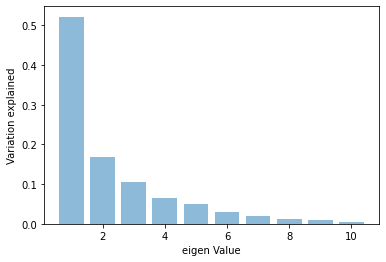

In [ ]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

2.3 e)

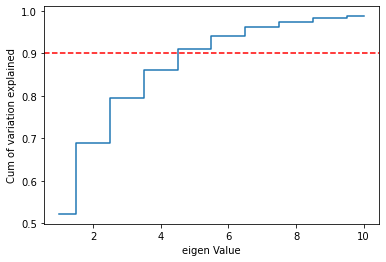

In [ ]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid', )
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.9, color = 'r', linestyle = 'dashed')
plt.show()

2.3 f)

In [ ]:
pca = PCA(n_components=5)
pca.fit(XScaled)
Xpca = pca.transform(XScaled)

2.3 g)

In [ ]:
clf.fit(Xpca, Y)
clf.score(Xpca , Y)

0.7813238770685579

2.3 h)

In [ ]:
y_pred=clf.predict(Xpca)
print(classification_report(Y, y_pred))
print(confusion_matrix(Y, y_pred))

              precision    recall  f1-score   support

         bus       0.76      0.70      0.73       218
         car       0.85      0.88      0.86       429
         van       0.66      0.66      0.66       199

    accuracy                           0.78       846
   macro avg       0.75      0.75      0.75       846
weighted avg       0.78      0.78      0.78       846

[[152  37  29]
 [ 14 377  38]
 [ 35  32 132]]


2.4 a)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)


In [ ]:
pca = PCA(n_components=10)
pca.fit(XScaled)
Xpca = pca.transform(XScaled)

In [ ]:
grid.fit(Xpca , Y)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
grid.score(Xpca,Y)

1.0

2.4 b)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


2.4 c)

In [ ]:
grid_predictions = grid.predict(Xpca)
print(confusion_matrix(Y,grid_predictions))
print(classification_report(Y,grid_predictions))

[[218   0   0]
 [  0 429   0]
 [  0   0 199]]
              precision    recall  f1-score   support

         bus       1.00      1.00      1.00       218
         car       1.00      1.00      1.00       429
         van       1.00      1.00      1.00       199

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



2.5 a) pre-requisite/assumptions of PCA

PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance should be disregarded as noise.
Also,
The algorithm is not well suited to capturing non-linear relationships. That's why it's advised to turn non-linear features or relationships between features into linear, using the standard methods such as log transforms.

2.5 b) Advantages and limitations of PCA


Advantages of PCA are
It Reduces Overfitting by reducing the number of features.
Improves Visualization by transforming a high dimensional data to low dimensional data
Removes Correlated Features due to this training time of the algorithms reduces significantly with less number of features.

Disadvantages of PCA are
Independent variables become less interpretable,
Data standardization is must before PCA as Changing scales of the variables can change the PCA so standardization of data is done before doing PCA.

In [ ]:
!jupyter nbconvert --to html Unsupervised_Learning.ipynb

[NbConvertApp] Converting notebook Unsupervised_Learning.ipynb to html
[NbConvertApp] Writing 1670990 bytes to Unsupervised_Learning.html
